In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [3]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
data.reset_index(inplace=True)

In [7]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.532528,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.603836,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.373516,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.150156,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.465409,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.076508,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,90.976578,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.637405,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,88.931602,23020500


In [9]:
ma_100_days = data.Close.rolling(100).mean()

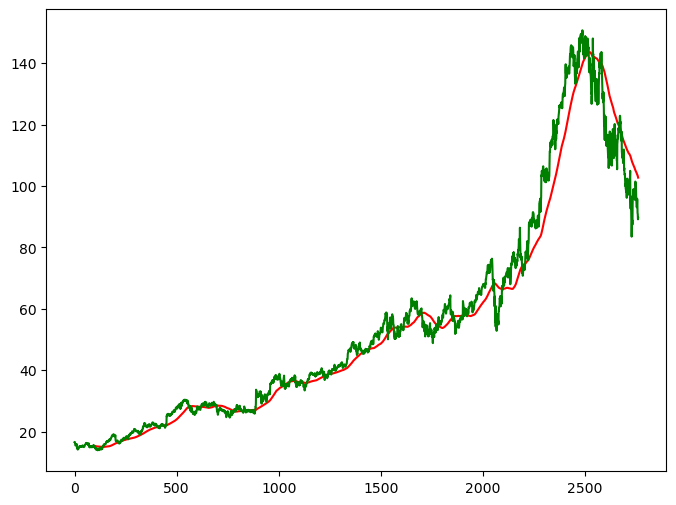

In [11]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [13]:
ma_200_days = data.Close.rolling(200).mean()

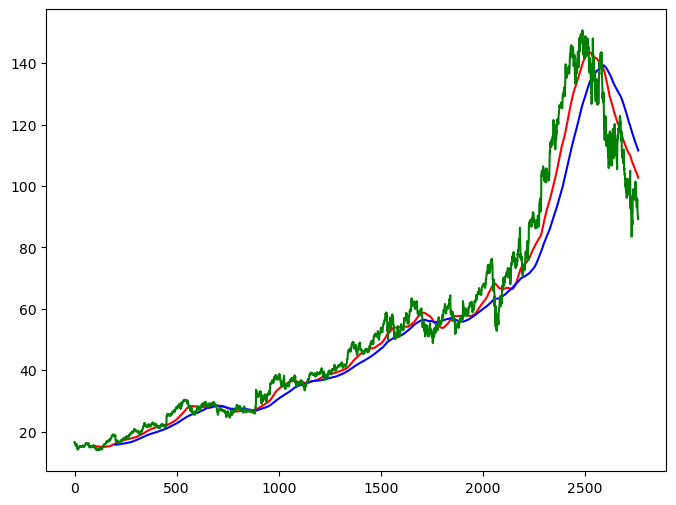

In [15]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [17]:
data.dropna(inplace=True)

In [19]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [21]:
data_train.shape[0]

2208

In [23]:
data_test.shape[0]

553

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [27]:
data_train_scale = scaler.fit_transform(data_train)

In [29]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [37]:
x, y = np.array(x), np.array(y)

In [39]:
!pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.67.1-cp312-cp312-macosx_10_9_universal2.whl.metadata (3.9 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-macosx_10_9_universal2.whl.metadata (20 kB)
  Using cached namex-0.0.8-py3-none-any.whl.met

In [42]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [45]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [49]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 189ms/step - loss: 0.0867
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - loss: 0.0081
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - loss: 0.0064
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 208ms/step - loss: 0.0061
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0055
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 207ms/step - loss: 0.0062
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - loss: 0.0052
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - loss: 0.0047
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0050
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - loss: 0.0044
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 196ms/step - loss: 0.0050
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - loss: 0.0043
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 206ms/step - loss: 0.0044
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - loss: 0.0045
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 

In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [53]:
pas_100_days = data_train.tail(100)

In [55]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [57]:
data_test_scale  =  scaler.fit_transform(data_test)

In [59]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [61]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step


In [63]:
scale =1/scaler.scale_

In [65]:
y_predict = y_predict*scale

In [67]:
y = y*scale

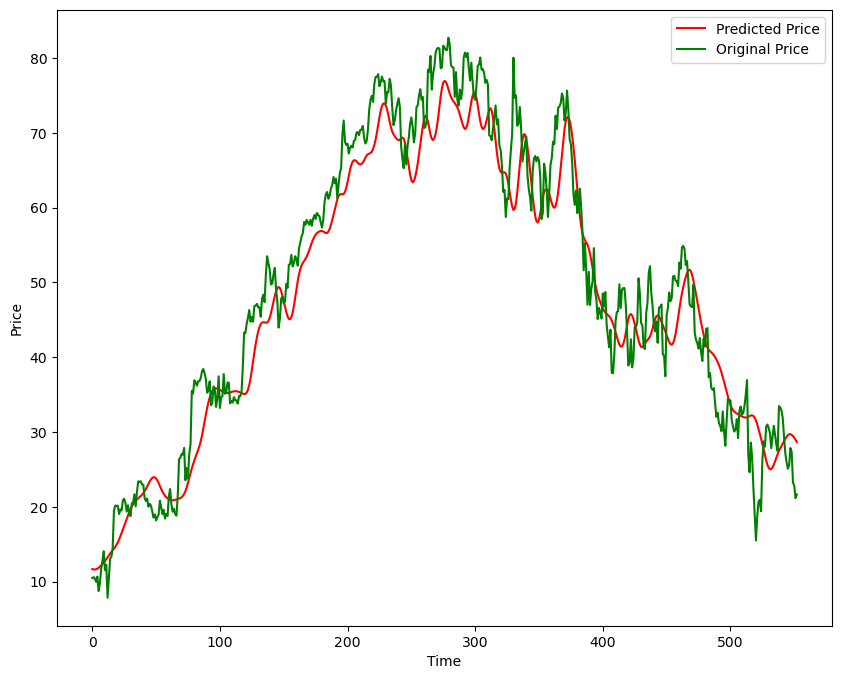

In [69]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [71]:
model.save('Stock Predictions Model.keras')